In [69]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import ast
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [70]:
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India') ].copy()

In [71]:
df_da['month_no'] = df_da['job_posted_date'].dt.month

In [72]:
df_da_skills = df_da.explode('job_skills')

In [73]:
df_pivot = df_da_skills.pivot_table(index="month_no", columns='job_skills', aggfunc='size', fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot_sort = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot_sort = df_pivot_sort.drop('Total')
df_pivot_sort

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,0,0,0,1,0,0,0,0,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,1,0,0,0,0,0,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,1,0,0,0,0,0,1,0,0
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,1
7,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [74]:
da_total = df_da.groupby('month_no').size()
da_total

month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [75]:
df_percent = df_pivot_sort.div(da_total/100, axis=0)

In [78]:
df_percent = df_percent.reset_index()
df_percent['df_month_name'] = df_percent['month_no'].apply(lambda x :pd.to_datetime(x, format='%m').strftime('%b') )
df_percent = df_percent.set_index('df_month_name')
df_percent = df_percent.drop(columns='month_no')

In [85]:
df_percent = df_percent.iloc[: ,:5]
df_percent

job_skills,sql,python,excel,tableau,power bi
df_month_name,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096
Feb,48.267898,34.180139,36.027714,26.789838,17.321016
Mar,54.265403,35.781991,32.701422,29.620853,18.009479
Apr,48.803828,34.210526,33.014354,23.444976,19.856459
May,55.755396,36.330935,38.129496,25.539568,21.942446
Jun,52.588556,40.871935,31.335150,31.062670,20.980926
Jul,53.610503,35.229759,38.074398,27.133479,20.350109
Aug,51.294498,34.951456,31.067961,24.595469,20.550162
Sep,54.126984,36.349206,36.190476,30.952381,26.666667


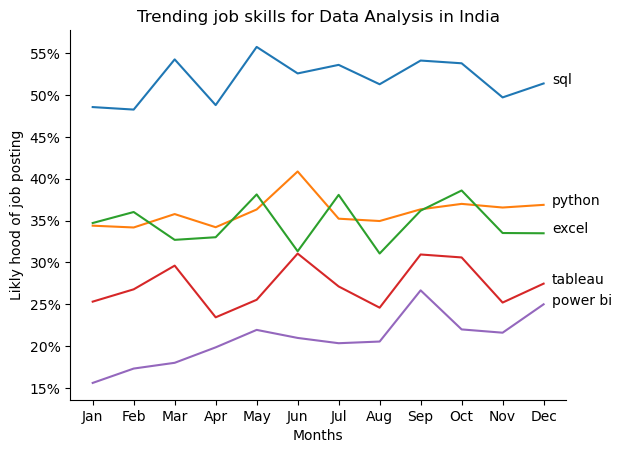

In [103]:
sns.lineplot(data=df_percent, dashes=False, legend=False)
sns.despine()
plt.xlabel('Months')
plt.ylabel('Likly hood of job posting')
plt.title('Trending job skills for Data Analysis in India')
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for x in range(5):
    plt.text(11.2, df_percent.iloc[-1,x], df_percent.columns[x])